# _`automaton`_`.compose`

The (accessible part of the) composition of two transducers ($A_1$ and $A_2$).

Preconditions:
- $A_1$ and $A_2$ are transducers
- $A_1$ has at least 2 tapes
- The second tape of $A_1$ must have the same labelset as the first tape of $A_2$

Postconditions:
- $\forall u \in alphabet(A_1)^*, \; A_2.eval(A_1.eval(u)) = A_1.compose(A_2).eval(u)$

See also:
- [_automaton_.insplit](automaton.insplit.ipynb)

## Examples

In [1]:
import vcsn
ctx1 = vcsn.context("lat<lal<char(ab)>, lal<char(jk)>>, b")
ctx2 = vcsn.context("lat<lal<char(jk)>, lal<char(xy)>>, b")

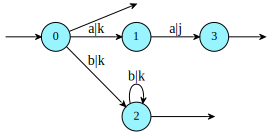

In [2]:
a1 = ctx1.expression("(a|k)(a|j) + (b|k)*").automaton()
a1

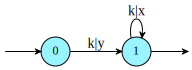

In [3]:
a2 = ctx2.expression("(k|y)(k|x)*").automaton()
a2

The result of the composition has a useless state. Note that only the accessible part has been computed.

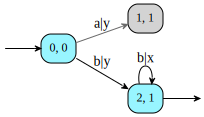

In [4]:
a1.compose(a2)

### Translations
The composition of a "_translator_" from French to English with one from English to Spanish is analogous to the computation of the French to Spanish "_translator_".

In [5]:
%%file fr2en
chien|dog
chat|cat

Overwriting fr2en


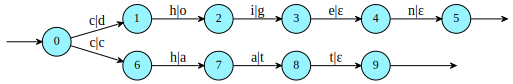

In [6]:
ctx = vcsn.context("lat<lan<char>, lan<char>>, b")
fr_to_en = ctx.trie(filename='fr2en').letterize()
fr_to_en

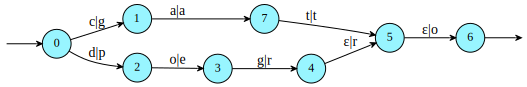

In [7]:
en_to_es = ctx.expression("dog|perro + cat|gato").automaton()
en_to_es

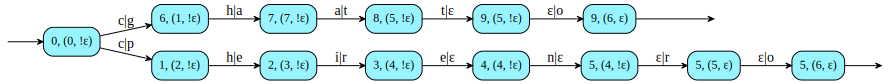

In [8]:
fr_to_es = fr_to_en.compose(en_to_es)
fr_to_es

### Lazy composition

The composition can be computed on-the-fly.

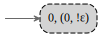

In [9]:
fr_to_es_lazy = fr_to_en.compose(en_to_es, lazy=True)
fr_to_es_lazy

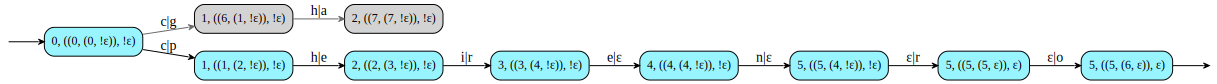

In [10]:
chien = ctx.expression("chien|chien").automaton()
chien.compose(fr_to_es_lazy)

The state $8, (5, !\varepsilon)$ is unresolved, and will only be computed when necessary.

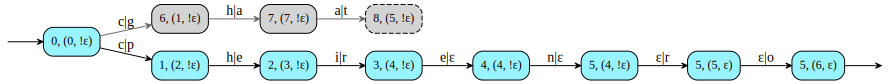

In [11]:
fr_to_es_lazy

### Relying on "string-letters"
This example follows the same path, but using letters that are strings.

In [12]:
import vcsn
ctx = vcsn.context("lat<lan<string>, lan<string>>, b")
ctx

{...}? x {...}? -> B

In [13]:
%%file fr2en
'chien'|'dog'
'chat'|'cat'
'oiseau'|'bird'
'souris'|'mouse'
'souris'|'mice'

Overwriting fr2en


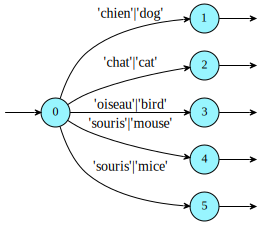

In [14]:
fr2en = ctx.trie(filename='fr2en')
fr2en

In [15]:
%%file en2es
'dog'|'perro'
'cat'|'gato'
'mouse'|'ratón'
'mice'|'ratones'

Overwriting en2es


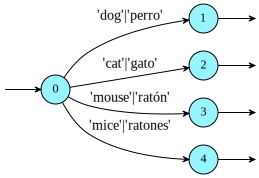

In [16]:
en2es = ctx.trie(filename='en2es')
en2es

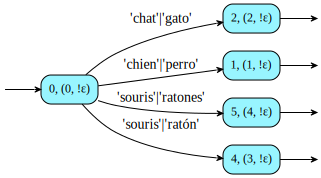

In [17]:
fr2en.compose(en2es)